# Results analysis (aggregation and plots)

This notebook serves to aggregate the different metrics recorded subject to the hyperparameter settings and then present the summaries

In [136]:
# imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tqdm import tqdm

%matplotlib inline

def get_files(metrics_folder):
    all_files = list(set([os.path.join(metrics_folder, f) for f in os.listdir(metrics_folder)]))
    return all_files

def process_results2pandas(metrics_folder):
    """Creates a pandas table from the saved results dicts
    related to the input dataset name
    
    Args:
        metrics_folder (str or os.Path): path to metrics folder

    Returns:
        df (pd.DataFrame): pandas dataframe with all the different results
            and hyperparameters of interest
    """
    
    
    metric_names = ["inf_cellDensity_cellCount_correlation",
    "inf_mRNA_sim_mRNA_correlation",
    "inf_cellproportion_sim_cellproportion_correlation",
    "inf_mRNAProportion_sim_mRNAProportion_correlation",
    "inf_mRNACount_sim_cellCount_correlation",
    "sim_mRNACount_sim_cellCount_proportion",
    "cellcount_su_ha_mode_average_score",
    "cellcount_su_ha_precision",
    "cellcount_su_ha_recall",
    "cellcount_su_ha_average_precision",
    "cellcount_su_la_mode_average_score",
    "cellcount_su_la_precision",
    "cellcount_su_la_recall",
    "cellcount_su_la_average_precision",
    "cellcount_sparse_ha_mode_average_score",
    "cellcount_sparse_ha_precision",
    "cellcount_sparse_ha_recall",
    "cellcount_sparse_ha_average_precision",
    "cellcount_sparse_la_mode_average_score",
    "cellcount_sparse_la_precision",
    "cellcount_sparse_la_recall",
    "cellcount_sparse_la_average_precision",
    "cellcount_all_mode_average_score",
    "cellcount_all_precision",
    "cellcount_all_recall",
    "cellcount_all_average_precision",
    "cellproportion_su_ha_mode_average_score",
    "cellproportion_su_ha_precision",
    "cellproportion_su_ha_recall",
    "cellproportion_su_ha_average_precision",
    "cellproportion_su_la_mode_average_score",
    "cellproportion_su_la_precision",
    "cellproportion_su_la_recall",
    "cellproportion_su_la_average_precision",
    "cellproportion_sparse_ha_mode_average_score",
    "cellproportion_sparse_ha_precision",
    "cellproportion_sparse_ha_recall",
    "cellproportion_sparse_ha_average_precision",
    "cellproportion_sparse_la_mode_average_score",
    "cellproportion_sparse_la_precision",
    "cellproportion_sparse_la_recall",
    "cellproportion_sparse_la_average_precision",
    "cellproportion_all_mode_average_score",
    "cellproportion_all_precision",
    "cellproportion_all_recall",
    "cellproportion_all_average_precision",
    "cellproportion_all_jsd",
    "cellproportion_su_ha_jsd",
    "cellproportion_su_la_jsd",
    "cellproportion_sparse_ha_jsd",
    "cellproportion_sparse_la_jsd",
    "cellproportion_su_ha_correlation",
    "cellproportion_su_la_correlation",
    "cellproportion_sparse_ha_correlation",
    "cellproportion_sparse_la_correlation"]
    
    df_columns = ["model_name", "num_c2l_epochs", 
           "cell_abundance_site", "nameprefix", 
           "random_seed"]
    df_columns.extend(metric_names)
    df_rows = []
    all_files = get_files(metrics_folder)
    for fpath in tqdm(all_files, "### Loading and extracting data..."):
        with open(fpath, 'rb') as handle:
            metrics = pickle.load(handle)
            f = os.path.basename(fpath)
            f = f.replace(".pkl", "")
        
            model_name, _, num_c2l_epochs, random_seed = f.split("-") 
            cell_abundance_site = metrics["cell_abundance_site"]
            nameprefix = metrics["nameprefix"]
            
        #reset_types
        model_name = model_name
        num_c2l_epochs = int(num_c2l_epochs)
        cell_abundance_site = cell_abundance_site
        nameprefix = nameprefix
        random_seed = random_seed
        
        inf_cellDensity_cellCount_correlation = metrics["inf_cellDensity_cellCount_correlation"]
        inf_mRNA_sim_mRNA_correlation = metrics["inf_mRNA_sim_mRNA_correlation"]
        inf_cellproportion_sim_cellproportion_correlation = metrics["inf_cellproportion_sim_cellproportion_correlation"]
        inf_mRNAProportion_sim_mRNAProportion_correlation = metrics["inf_mRNAProportion_sim_mRNAProportion_correlation"]
        inf_mRNACount_sim_cellCount_correlation = metrics["inf_mRNACount_sim_cellCount_correlation"]
        sim_mRNACount_sim_cellCount_proportion = metrics["sim_mRNACount_sim_cellCount_proportion"]
        cellcount_su_ha_mode_average_score = metrics["cellcount_su_ha_mode_average_score"]
        cellcount_su_ha_precision = metrics["cellcount_su_ha_precision"]
        cellcount_su_ha_recall = metrics["cellcount_su_ha_recall"]
        cellcount_su_ha_average_precision = metrics["cellcount_su_ha_average_precision"]
        cellcount_su_la_mode_average_score = metrics["cellcount_su_la_mode_average_score"]
        cellcount_su_la_precision = metrics["cellcount_su_la_precision"]
        cellcount_su_la_recall = metrics["cellcount_su_la_recall"]
        cellcount_su_la_average_precision = metrics["cellcount_su_la_average_precision"]
        cellcount_sparse_ha_mode_average_score = metrics["cellcount_sparse_ha_mode_average_score"]
        cellcount_sparse_ha_precision = metrics["cellcount_sparse_ha_precision"]
        cellcount_sparse_ha_recall = metrics["cellcount_sparse_ha_recall"]
        cellcount_sparse_ha_average_precision = metrics["cellcount_sparse_ha_average_precision"]
        cellcount_sparse_la_mode_average_score = metrics["cellcount_sparse_la_mode_average_score"]
        cellcount_sparse_la_precision = metrics["cellcount_sparse_la_precision"]
        cellcount_sparse_la_recall = metrics["cellcount_sparse_la_recall"]
        cellcount_sparse_la_average_precision = metrics["cellcount_sparse_la_average_precision"]
        cellcount_all_mode_average_score = metrics["cellcount_all_mode_average_score"]
        cellcount_all_precision = metrics["cellcount_all_precision"]
        cellcount_all_recall = metrics["cellcount_all_recall"]
        cellcount_all_average_precision = metrics["cellcount_all_average_precision"]
        cellproportion_su_ha_mode_average_score = metrics["cellproportion_su_ha_mode_average_score"]
        cellproportion_su_ha_precision = metrics["cellproportion_su_ha_precision"]
        cellproportion_su_ha_recall = metrics["cellproportion_su_ha_recall"]
        cellproportion_su_ha_average_precision = metrics["cellproportion_su_ha_average_precision"]
        cellproportion_su_la_mode_average_score = metrics["cellproportion_su_la_mode_average_score"]
        cellproportion_su_la_precision = metrics["cellproportion_su_la_precision"]
        cellproportion_su_la_recall = metrics["cellproportion_su_la_recall"]
        cellproportion_su_la_average_precision = metrics["cellproportion_su_la_average_precision"]
        cellproportion_sparse_ha_mode_average_score = metrics["cellproportion_sparse_ha_mode_average_score"]
        cellproportion_sparse_ha_precision = metrics["cellproportion_sparse_ha_precision"]
        cellproportion_sparse_ha_recall = metrics["cellproportion_sparse_ha_recall"]
        cellproportion_sparse_ha_average_precision = metrics["cellproportion_sparse_ha_average_precision"]
        cellproportion_sparse_la_mode_average_score = metrics["cellproportion_sparse_la_mode_average_score"]
        cellproportion_sparse_la_precision = metrics["cellproportion_sparse_la_precision"]
        cellproportion_sparse_la_recall = metrics["cellproportion_sparse_la_recall"]
        cellproportion_sparse_la_average_precision = metrics["cellproportion_sparse_la_average_precision"]
        cellproportion_all_mode_average_score = metrics["cellproportion_all_mode_average_score"]
        cellproportion_all_precision = metrics["cellproportion_all_precision"]
        cellproportion_all_recall = metrics["cellproportion_all_recall"]
        cellproportion_all_average_precision = metrics["cellproportion_all_average_precision"]

        cellproportion_all_jsd = metrics["cellproportion_all_jsd"]
        cellproportion_su_ha_jsd = metrics["cellproportion_su_ha_jsd"]
        cellproportion_su_la_jsd = metrics["cellproportion_su_la_jsd"]
        cellproportion_sparse_ha_jsd = metrics["cellproportion_sparse_ha_jsd"]
        cellproportion_sparse_la_jsd = metrics["cellproportion_sparse_la_jsd"]
        cellproportion_su_ha_correlation = metrics["cellproportion_su_ha_correlation"]
        cellproportion_su_la_correlation = metrics["cellproportion_su_la_correlation"]
        cellproportion_sparse_ha_correlation = metrics["cellproportion_sparse_ha_correlation"]
        cellproportion_sparse_la_correlation = metrics["cellproportion_sparse_la_correlation"]

        
        metric_values = [inf_cellDensity_cellCount_correlation,
        inf_mRNA_sim_mRNA_correlation,
        inf_cellproportion_sim_cellproportion_correlation,
        inf_mRNAProportion_sim_mRNAProportion_correlation,
        inf_mRNACount_sim_cellCount_correlation,
        sim_mRNACount_sim_cellCount_proportion,
        cellcount_su_ha_mode_average_score,
        cellcount_su_ha_precision,
        cellcount_su_ha_recall,
        cellcount_su_ha_average_precision,
        cellcount_su_la_mode_average_score,
        cellcount_su_la_precision,
        cellcount_su_la_recall,
        cellcount_su_la_average_precision,
        cellcount_sparse_ha_mode_average_score,
        cellcount_sparse_ha_precision,
        cellcount_sparse_ha_recall,
        cellcount_sparse_ha_average_precision,
        cellcount_sparse_la_mode_average_score,
        cellcount_sparse_la_precision,
        cellcount_sparse_la_recall,
        cellcount_sparse_la_average_precision,
        cellcount_all_mode_average_score,
        cellcount_all_precision,
        cellcount_all_recall,
        cellcount_all_average_precision,
        cellproportion_su_ha_mode_average_score,
        cellproportion_su_ha_precision,
        cellproportion_su_ha_recall,
        cellproportion_su_ha_average_precision,
        cellproportion_su_la_mode_average_score,
        cellproportion_su_la_precision,
        cellproportion_su_la_recall,
        cellproportion_su_la_average_precision,
        cellproportion_sparse_ha_mode_average_score,
        cellproportion_sparse_ha_precision,
        cellproportion_sparse_ha_recall,
        cellproportion_sparse_ha_average_precision,
        cellproportion_sparse_la_mode_average_score,
        cellproportion_sparse_la_precision,
        cellproportion_sparse_la_recall,
        cellproportion_sparse_la_average_precision,
        cellproportion_all_mode_average_score,
        cellproportion_all_precision,
        cellproportion_all_recall,
        cellproportion_all_average_precision,
        cellproportion_all_jsd,
        cellproportion_su_ha_jsd,
        cellproportion_su_la_jsd,
        cellproportion_sparse_ha_jsd,
        cellproportion_sparse_la_jsd,
        cellproportion_su_ha_correlation,
        cellproportion_su_la_correlation,
        cellproportion_sparse_ha_correlation,
        cellproportion_sparse_la_correlation]
        
        row = [model_name, num_c2l_epochs, 
               cell_abundance_site, nameprefix, 
               random_seed]
        row.extend(metric_values)
        df_rows.append(row)
    
    df = pd.DataFrame(df_rows, columns=df_columns)
    return df
        

In [137]:
results_folder = 'results'
metrics_folder = os.path.join(results_folder, 'metrics_app')
df = process_results2pandas(metrics_folder)
df.head()

### Loading and extracting data...: 100%|██████████| 30/30 [00:00<00:00, 276.77it/s]


,model_name,num_c2l_epochs,cell_abundance_site,nameprefix,random_seed,inf_cellDensity_cellCount_correlation,inf_mRNA_sim_mRNA_correlation,inf_cellproportion_sim_cellproportion_correlation,inf_mRNAProportion_sim_mRNAProportion_correlation,inf_mRNACount_sim_cellCount_correlation,...,cellproportion_all_average_precision,cellproportion_all_jsd,cellproportion_su_ha_jsd,cellproportion_su_la_jsd,cellproportion_sparse_ha_jsd,cellproportion_sparse_la_jsd,cellproportion_su_ha_correlation,cellproportion_su_la_correlation,cellproportion_sparse_ha_correlation,cellproportion_sparse_la_correlation
0,GAT_ASF_PyG_4Layer,25000,a_sf,gnn_cell_abundance,1,0.785,0.783,0.741,0.777,0.927,...,"{'Oligo_2': 0.503375653476594, 'Astro_HYPO': 0...",0.434906,0.179213,0.443348,0.362087,0.483652,0.908,0.682,0.881,0.507
1,GAT_ASF_PyG_4Layer,25000,a_sf,gnn_cell_abundance,2,0.740,0.783,0.682,0.777,0.927,...,"{'Oligo_2': 0.5275020728969267, 'Astro_HYPO': ...",0.440950,0.222776,0.447451,0.352169,0.486867,0.865,0.714,0.888,0.441
2,GAT_ASF_PyG_4Layer,25000,a_sf,gnn_cell_abundance,4,0.765,0.783,0.709,0.777,0.927,...,"{'Oligo_2': 0.5342402662589697, 'Astro_HYPO': ...",0.443700,0.226828,0.469943,0.358559,0.488076,0.868,0.657,0.876,0.470
3,GCNModel_ASF_4Layer,25000,a_sf,gnn_cell_abundance,2,0.779,0.783,0.722,0.777,0.927,...,"{'Oligo_2': 0.48984990069245893, 'Astro_HYPO':...",0.446223,0.213686,0.455451,0.366399,0.499437,0.894,0.731,0.893,0.442
4,GCNModel_ASF_6Layer,25000,a_sf,gnn_cell_abundance,5,0.756,0.783,0.702,0.777,0.927,...,"{'Oligo_2': 0.5244598867547909, 'Astro_HYPO': ...",0.442358,0.172202,0.469229,0.378246,0.488340,0.910,0.689,0.887,0.437


## Study hyperparameters

In [138]:
num_c2l_epochs = 25000
metric = "cellproportion_sparse_la_mode_average_score"

In [139]:
# Sample down
df = process_results2pandas(metrics_folder)
df = df[df['num_c2l_epochs']==num_c2l_epochs]

# Summarise
for model_name in sorted(list(set(df.model_name))):
    model_specific_df = df[(df['model_name']==model_name)]
    print(f"\n### {model_name}")
    mean_metric = np.around(np.mean(model_specific_df[metric]), 3)
    std_metric = np.around(np.std(model_specific_df[metric]), 3)
    num_emp_samples = len(model_specific_df[metric])
    print(f"{model_name}: {metric}: {mean_metric} +- {std_metric} with {num_emp_samples} samples")

### Loading and extracting data...: 100%|██████████| 30/30 [00:00<00:00, 384.56it/s]


### GAT_ASF_PyG_4Layer
GAT_ASF_PyG_4Layer: cellproportion_sparse_la_mode_average_score: 0.71 +- 0.003 with 5 samples

### GAT_ASF_PyG_5Layer
GAT_ASF_PyG_5Layer: cellproportion_sparse_la_mode_average_score: 0.7 +- 0.002 with 5 samples

### GAT_ASF_PyG_6Layer
GAT_ASF_PyG_6Layer: cellproportion_sparse_la_mode_average_score: 0.702 +- 0.003 with 5 samples

### GCNModel_ASF_4Layer
GCNModel_ASF_4Layer: cellproportion_sparse_la_mode_average_score: 0.701 +- 0.004 with 5 samples

### GCNModel_ASF_5Layer
GCNModel_ASF_5Layer: cellproportion_sparse_la_mode_average_score: 0.701 +- 0.007 with 5 samples

### GCNModel_ASF_6Layer
GCNModel_ASF_6Layer: cellproportion_sparse_la_mode_average_score: 0.701 +- 0.007 with 5 samples


In [140]:
# Plot error bar lines with respect to increasing receptive field size
# This one is for average pearson r


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'GAT_ASF_PyG_4Layer'),
  Text(1, 0, 'GCNModel_ASF_4Layer'),
  Text(2, 0, 'GCNModel_ASF_6Layer'),
  Text(3, 0, 'GAT_ASF_PyG_6Layer'),
  Text(4, 0, 'GAT_ASF_PyG_5Layer'),
  Text(5, 0, 'GCNModel_ASF_5Layer')])

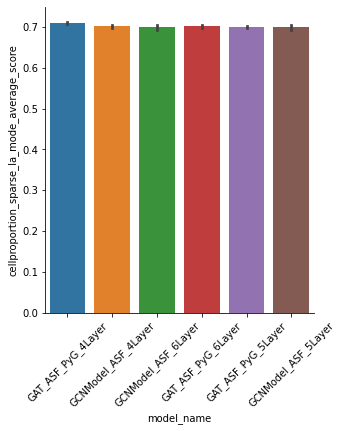

In [141]:
sns.catplot(x = "model_name", y = metric, kind="bar", data=df)
plt.xticks(rotation=45)

# Plot all

In [142]:
metric_names = ["inf_cellDensity_cellCount_correlation",
"inf_mRNA_sim_mRNA_correlation",
"inf_cellproportion_sim_cellproportion_correlation",
"inf_mRNAProportion_sim_mRNAProportion_correlation",
"inf_mRNACount_sim_cellCount_correlation",
"sim_mRNACount_sim_cellCount_proportion",
"cellcount_su_ha_mode_average_score",
# "cellcount_su_ha_precision",
# "cellcount_su_ha_recall",
# "cellcount_su_ha_average_precision",
"cellcount_su_la_mode_average_score",
# "cellcount_su_la_precision",
# "cellcount_su_la_recall",
# "cellcount_su_la_average_precision",
"cellcount_sparse_ha_mode_average_score",
# "cellcount_sparse_ha_precision",
# "cellcount_sparse_ha_recall",
# "cellcount_sparse_ha_average_precision",
"cellcount_sparse_la_mode_average_score",
# "cellcount_sparse_la_precision",
# "cellcount_sparse_la_recall",
# "cellcount_sparse_la_average_precision",
"cellcount_all_mode_average_score",
# "cellcount_all_precision",
# "cellcount_all_recall",
# "cellcount_all_average_precision",
"cellproportion_su_ha_mode_average_score",
# "cellproportion_su_ha_precision",
# "cellproportion_su_ha_recall",
# "cellproportion_su_ha_average_precision",
"cellproportion_su_la_mode_average_score",
# "cellproportion_su_la_precision",
# "cellproportion_su_la_recall",
# "cellproportion_su_la_average_precision",
"cellproportion_sparse_ha_mode_average_score",
# "cellproportion_sparse_ha_precision",
# "cellproportion_sparse_ha_recall",
# "cellproportion_sparse_ha_average_precision",
"cellproportion_sparse_la_mode_average_score",
# "cellproportion_sparse_la_precision",
# "cellproportion_sparse_la_recall",
# "cellproportion_sparse_la_average_precision",
"cellproportion_all_mode_average_score",
# "cellproportion_all_precision",
# "cellproportion_all_recall",
# "cellproportion_all_average_precision"]
               ]

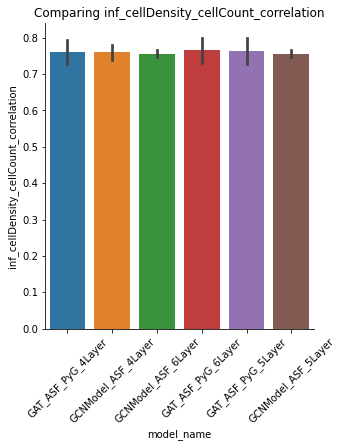

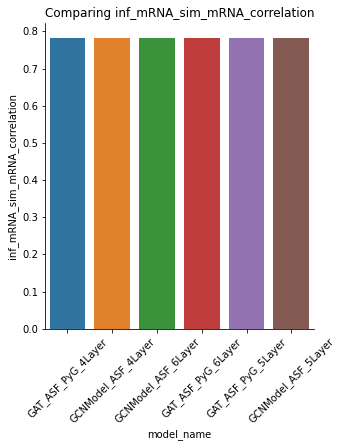

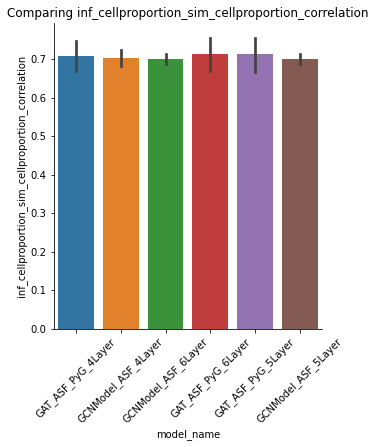

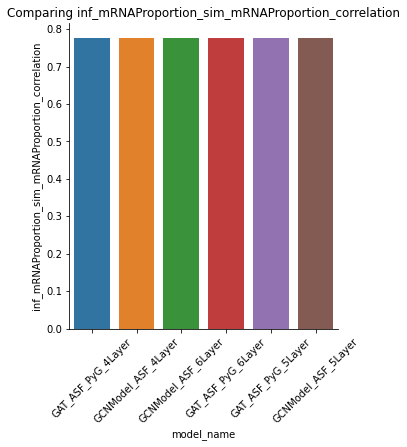

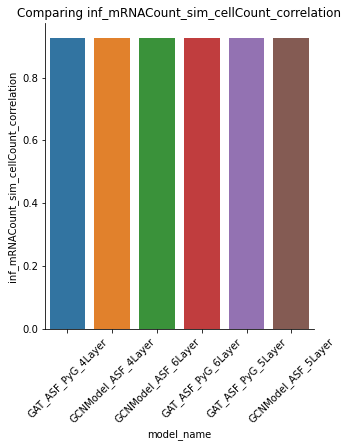

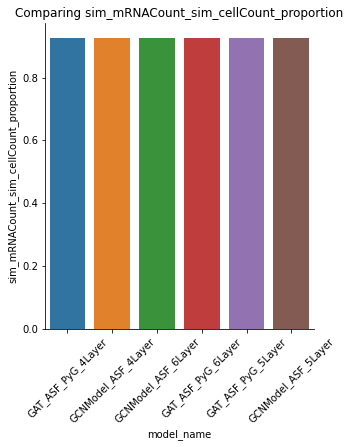

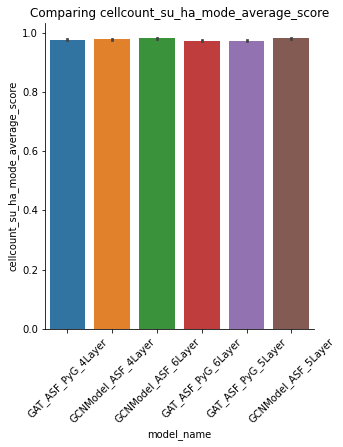

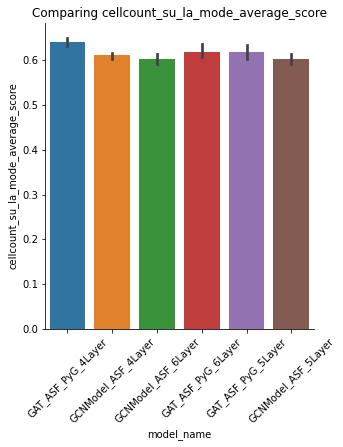

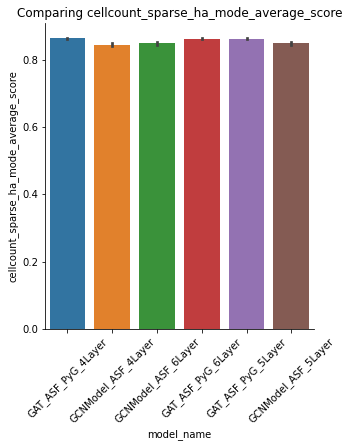

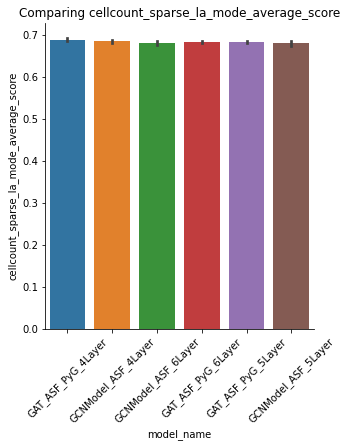

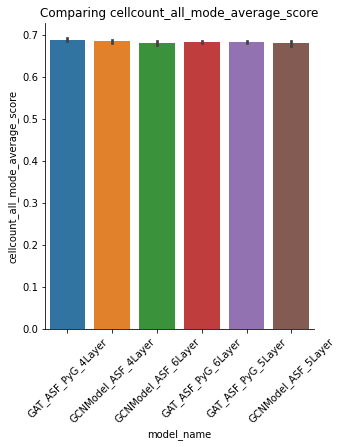

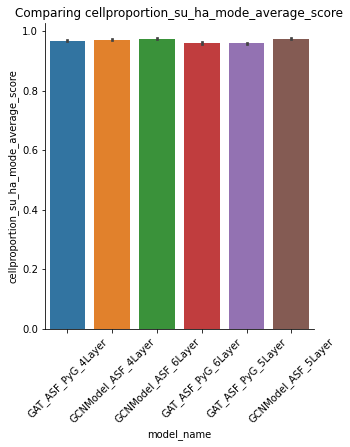

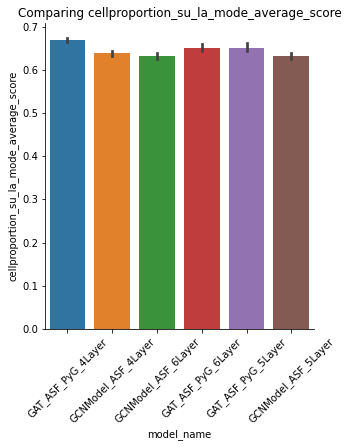

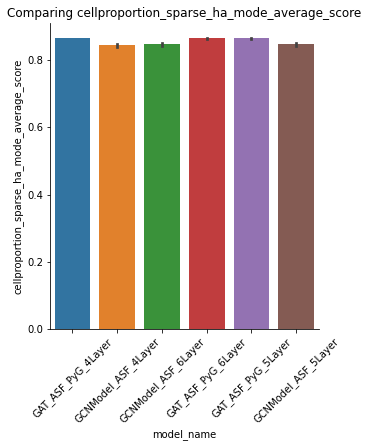

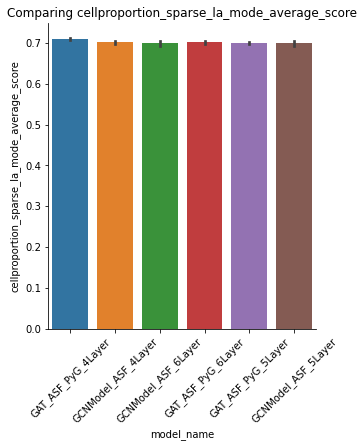

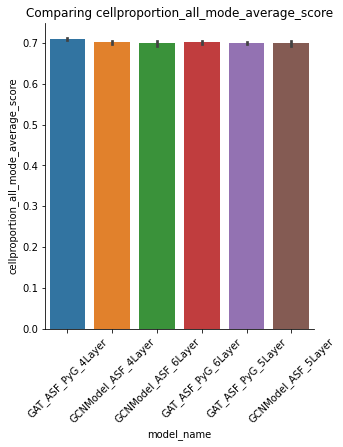

In [143]:
import seaborn as sns
for metric in metric_names:
    sns.catplot(x = "model_name", y = metric, kind="bar", data=df).set(title=f"Comparing {metric}")
    plt.xticks(rotation=45)